In [6]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plot

In [7]:
env = MountainCarEnv(render_mode="rbg_array")

In [8]:
pos_space = np.linspace(env.min_position, env.max_position, 20)
vel_space = np.linspace(-env.max_speed, env.max_speed, 20)
Q = np.zeros((len(pos_space), len(vel_space), env.action_space.n))


In [9]:
def epsilon_greedy_policy(state, Q, epsilon):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state[0], state[1]])
    return action

def get_state(obs):
    pos, vel = obs
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    return pos_bin, vel_bin

def run_mountain_car(Q, epsilon, alpha, gamma):
    done = False
    totalReward = 0
    obs = env.reset()
    state = get_state(obs)
    while not done:
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _ = env.step(action)
        totalReward += reward
        newState = get_state(obs)
        delta = alpha * (reward + gamma * np.max(Q[newState[0], newState[1]]) - Q[state[0], state[1], action])
        Q[state[0], state[1], action] += delta
        state = newState
    return totalReward



In [10]:
total_Q = []
learning_rewards = []
num_episodes = 20000
epsilon=0.8
alpha=0.5
gamma=0.99

# reduction = 2*epsilon/num_episodes

for i in range(num_episodes):
    totalReward = run_mountain_car(Q, epsilon, alpha, gamma)
    # if epsilon > 0.01:
    #     epsilon -= reduction
    learning_rewards.append(totalReward)
    total_Q.append(np.mean(Q))
    if (i+1) % 100 == 0:
        print(f"Episode {i+1} out of {num_episodes}; Reward {np.mean(totalReward)}; Epsilon {epsilon}")



Episode 100 out of 20000; Reward -500.0; Epsilon 0.9900000000000011
Episode 200 out of 20000; Reward -500.0; Epsilon 0.9800000000000022
Episode 300 out of 20000; Reward -500.0; Epsilon 0.9700000000000033
Episode 400 out of 20000; Reward -500.0; Epsilon 0.9600000000000044
Episode 500 out of 20000; Reward -500.0; Epsilon 0.9500000000000055
Episode 600 out of 20000; Reward -500.0; Epsilon 0.9400000000000066
Episode 700 out of 20000; Reward -500.0; Epsilon 0.9300000000000077
Episode 800 out of 20000; Reward -500.0; Epsilon 0.9200000000000088
Episode 900 out of 20000; Reward -500.0; Epsilon 0.9100000000000099
Episode 1000 out of 20000; Reward -500.0; Epsilon 0.900000000000011
Episode 1100 out of 20000; Reward -500.0; Epsilon 0.8900000000000121
Episode 1200 out of 20000; Reward -500.0; Epsilon 0.8800000000000132
Episode 1300 out of 20000; Reward -500.0; Epsilon 0.8700000000000143
Episode 1400 out of 20000; Reward -500.0; Epsilon 0.8600000000000154
Episode 1500 out of 20000; Reward -500.0; Ep

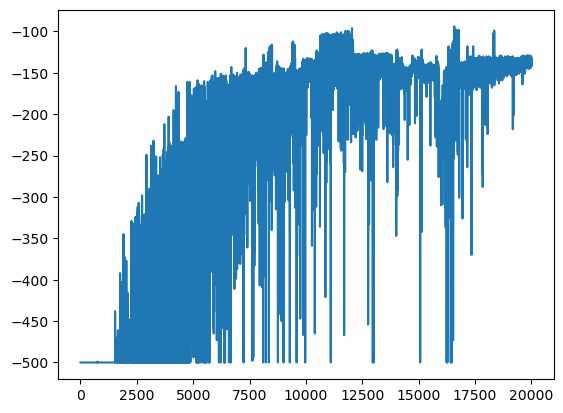

In [11]:
# Plot learing rewards
plot.plot(list(range(1, len(learning_rewards) + 1)), learning_rewards)
plot.show()

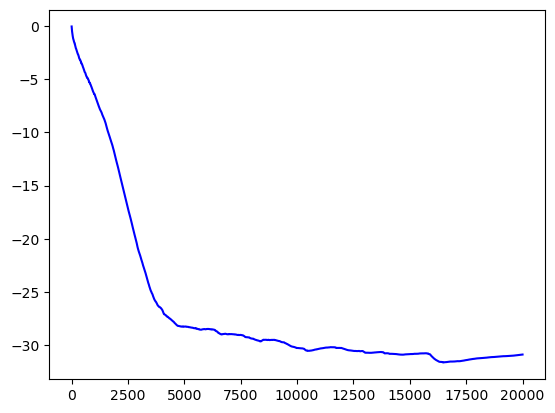

In [12]:
# Plot Q
plot.plot(list(range(1, len(total_Q) + 1)), total_Q, color='blue')
plot.show()


ValueError: x and y can be no greater than 2D, but have shapes (88654,) and (88654, 20, 20, 3)

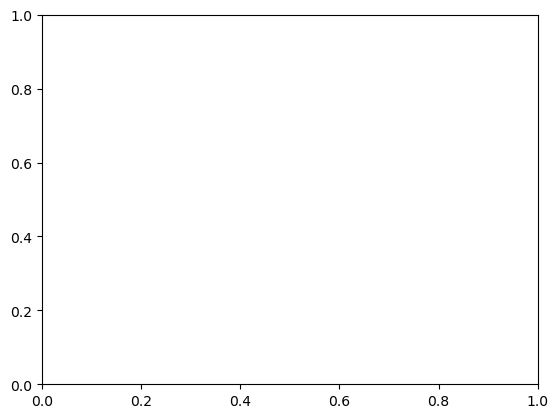

In [13]:
# plot Q
plot.plot((list(range(1, len(full_Q) + 1))), full_Q, color='blue')
plot.show()